In [3]:
%pwd

u'/home/matej/prace/ferda/ferda_regtrack/experiments/cardinality_classifier'

In [4]:
%cd ../..

/home/matej/prace/ferda/ferda_regtrack


In [5]:
from core.project.project import Project
from sys import maxsize
import numpy as np
import time
from utils.gt.gt_project import GtProject
import tqdm
from core import global_cardinality_classifier as g_cardinality_clf

In [24]:
import IPython
IPython.core.pylabtools.figsize(10,10)

In [6]:
# p = Project('test/project/Sowbug3_cut_300_frames')
# gt_path = 'data/GT/Sowbug3_cut.txt'
# p = Project('../projects/2_temp/Camera3-5min/190719_2239')
# gt_path = 'data/GT/Camera3-5min.mp4.txt'

p = Project('../projects/2_temp/Cam1_clip/190802_1621/')
gt_path = 'data/GT/Cam1_clip.avi.txt'



loading project: 100%|██████████| 4/4 [00:03<00:00,  1.68it/s]                            


In [7]:
correct_labels = {}
gt = GtProject(filename=gt_path)
gt.set_project_offsets(p)

In [8]:
# construct mapping "tracklet id -> number of objects" from GT
correct_labels = {t.id(): gt.get_tracklet_cardinality(p, t) for t in p.chm.tracklet_gen()}

100%|██████████| 4500/4500 [01:58<00:00, 38.02it/s]
utils/gt/gt_project.py:215: UserWarning: tracklet 220, 12% of frames haven't consistent track ids
  tracklet.id(), counts[1:].sum()/float(counts.sum())))
utils/gt/gt_project.py:215: UserWarning: tracklet 7477, 40% of frames haven't consistent track ids
  tracklet.id(), counts[1:].sum()/float(counts.sum())))
utils/gt/gt_project.py:215: UserWarning: tracklet 7540, 0% of frames haven't consistent track ids
  tracklet.id(), counts[1:].sum()/float(counts.sum())))
utils/gt/gt_project.py:215: UserWarning: tracklet 9752, 0% of frames haven't consistent track ids
  tracklet.id(), counts[1:].sum()/float(counts.sum())))
utils/gt/gt_project.py:215: UserWarning: tracklet 9889, 0% of frames haven't consistent track ids
  tracklet.id(), counts[1:].sum()/float(counts.sum())))
utils/gt/gt_project.py:215: UserWarning: tracklet 7892, 17% of frames haven't consistent track ids
  tracklet.id(), counts[1:].sum()/float(counts.sum())))
utils/gt/gt_project.py

In [17]:
t_id = 7893
match = gt.get_matched_tracklets(p)
track_ids = {frame: gt._GtProjectMixin__get_ids_from_match(match[frame], t_id) for frame in range(p.chm[t_id].start_frame(), p.chm[t_id].end_frame() + 1)}

In [18]:
track_ids

{2067: {0}, 2068: {4}, 2069: {4}, 2070: {4}, 2071: {4}, 2072: {4}}

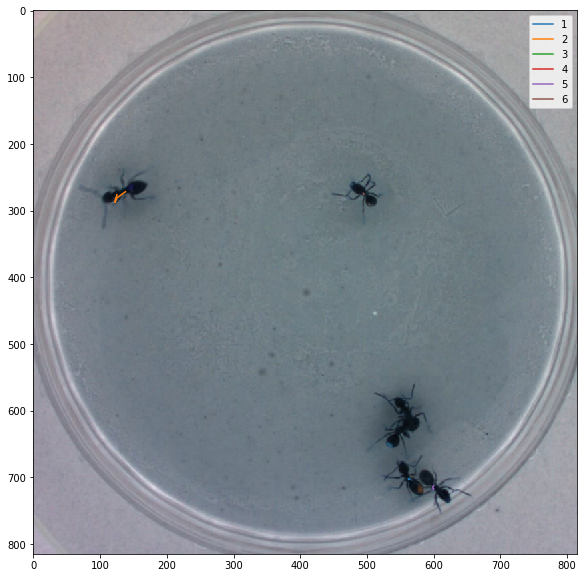

In [25]:
import matplotlib.pylab as plt
plt.imshow(p.img_manager.get_whole_img(track_ids.keys()[0]))
gt.draw(range(track_ids.keys()[0], track_ids.keys()[-1]))
plt.legend()

In [ ]:
import matplotlib.pylab as plt
plt.imshow(p.img_manager.get_whole_img(track_ids.keys()[0]))
gt.draw(range(track_ids.keys()[0], track_ids.keys()[-1]))
plt.legend()

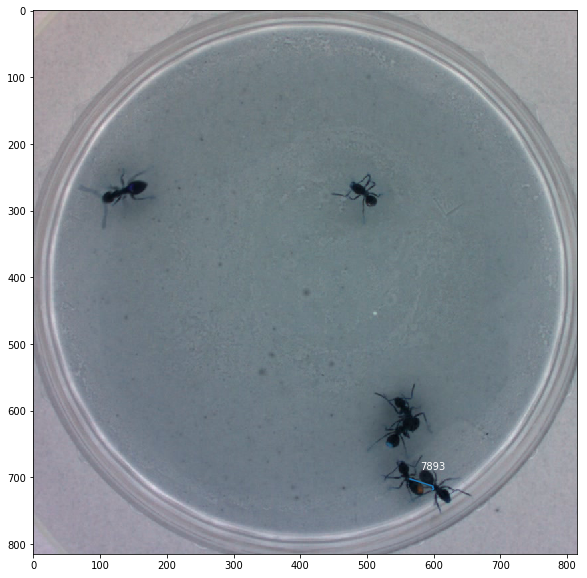

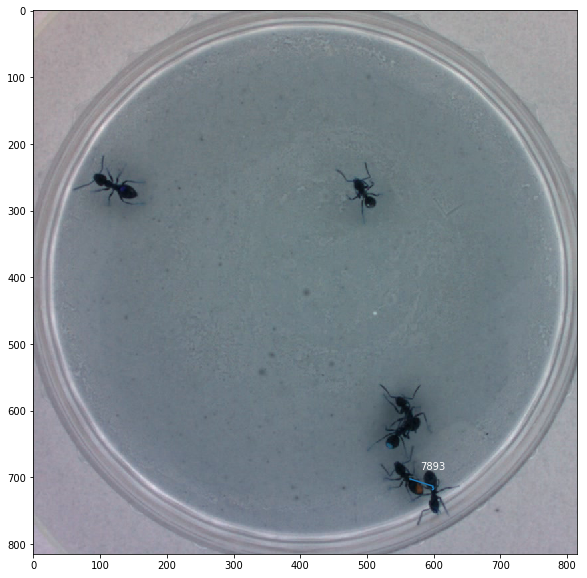

In [31]:
plt.imshow(p.img_manager.get_whole_img(track_ids.keys()[0]))
p.chm[t_id].draw(p.rm)
plt.figure()
plt.imshow(p.img_manager.get_whole_img(track_ids.keys()[-1]))
p.chm[t_id].draw(p.rm)

[{0}, {4}, {4}, {4}, {4}, {4}]

In [52]:
gt.ds.sel({'frame': range(frame - 2, frame + 3), 'id': 3})

<xarray.Dataset>
Dimensions:     (frame: 5)
Coordinates:
    id          int64 3
  * frame       (frame) int64 202 203 204 205 206
Data variables:
    x           (frame) float64 458.2 455.9 545.8 451.8 452.5
    y           (frame) float64 329.6 336.2 820.9 348.2 355.9
    width       (frame) float64 nan nan nan nan nan
    height      (frame) float64 nan nan nan nan nan
    confidence  (frame) float64 1.0 1.0 1.0 1.0 1.0

In [40]:
gt.get_positions_dataframe([203, 204, 205])

x           y  width  height  confidence
frame id                                                   
203   1   642.066154  506.349231    NaN     NaN         1.0
      2   423.170827   72.209048    NaN     NaN         1.0
      3   455.917227  336.244280    NaN     NaN         1.0
      4    99.720028  380.680536    NaN     NaN         1.0
      5   540.387114  824.809904    NaN     NaN         1.0
      6   562.554250  366.867089    NaN     NaN         1.0
      7   426.783124  136.494421    NaN     NaN         1.0
      8   635.065111  418.974201    NaN     NaN         1.0
      9   237.318898  419.492126    NaN     NaN         1.0
      10  234.763812  185.835635    NaN     NaN         1.0
204   1   644.854009  510.366868    NaN     NaN         1.0
      2   422.714858   72.521850    NaN     NaN         1.0
      3   545.812908  820.898970    NaN     NaN         1.0
      4    97.440195  381.241307    NaN     NaN         1.0
      5          NaN         NaN    NaN     NaN         NaN
      6   568.138596  366.154386    NaN     NaN         1.0
      7   418.116107  132.769799    NaN     NaN         1.0
      8   635.234417  418.544715    NaN     NaN         1.0
      9   236.875000  419.435127    NaN     NaN         1.0
      10  235.533635  179.434023    NaN     NaN         1.0
205   1   645.292248  515.486047    NaN     NaN         1.0
      2   422.678517   72.760968    NaN     NaN         1.0
      3   451.754374  348.220054    NaN     NaN         1.0
      4    97.988011  381.549365    NaN     NaN         1.0
      5   554.192784  820.296907    NaN     NaN         1.0
      6   571.858792  364.482238    NaN     NaN         1.0
      7   415.861430  132.733716    NaN     NaN         1.0
      8   635.416201  418.425978    NaN     NaN         1.0
      9   236.620325  418.927642    NaN     NaN         1.0
      10  232.564639  169.801648    NaN     NaN         1.0

In [93]:
pos = gt.get_positions(204)

In [95]:
pos.id.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [89]:
pos = gt.get_positions(203).sel(dict(id=5))

In [90]:
pos.x.isnull()

<xarray.DataArray 'x' ()>
array(False)
Coordinates:
    id       int64 5
    frame    int64 203

In [41]:
gt.interpolate_positions(204, 5)

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    id          int64 5
    frame       int64 204
Data variables:
    x           float64 547.3
    y           float64 822.6
    width       float64 nan
    height      float64 nan
    confidence  float64 1.0

In [12]:
reload(g_cardinality_clf)
collateral_sets = g_cardinality_clf.get_collateral_sets(p, max_frame=5000)
tracklets = set([t for cs in collateral_sets for t in cs])
print("#unique tracklets: {}, #collateral sets: {}".format(len(tracklets), len(collateral_sets)))

#unique tracklets: 18, #collateral sets: 36


In [33]:
# compute cardinalities using ILP
t = time.time()
predecessors = g_cardinality_clf.generate_predecessor_map(tracklets, p)
successors = g_cardinality_clf.generate_successor_map(tracklets, p)
print("predecessors t: {}".format(time.time() - t))

num_animals = len(p.animals)
t = time.time()
areas = g_cardinality_clf.get_median_areas(tracklets, p)
# TODO: medain_area should probably be median from all areas...
median_area = np.median(areas.values())
print("area median extraction time: {}".format(time.time() - t))
area_relaxation_coef = 0

print("#animals {}, #tracklets: {}, #collateral sets: {}, mean area: {}".format(num_animals, len(tracklets), len(collateral_sets), median_area))

cardinalities = g_cardinality_clf.build_ilp_and_solve(tracklets, collateral_sets, predecessors, successors, num_animals, 
                                                      median_area, areas, 
                                                      print_ilp=False)  # area_relaxation_coef=area_relaxation_coef, 

predecessors t: 0.24388217926
area median extraction time: 2.73370909691
#animals 6, #tracklets: 719, #collateral sets: 1438, mean area: 925.0
gamma: 2.0
var registration t: 0.048476934433
objective function: 92.4074997902
constraints: 11.8778829575
ILP construction tooks: 104.348696947s
('Status:', 'Optimal')
('Total Cost = ', 4346481.0)
time: 2.42585492134s
1


In [34]:
import copy
# ants3_tracklets = copy.copy(tracklets)
# ants3_cardinalities = copy.copy(cardinalities)

# sowbug3_tracklets = copy.copy(tracklets)
# sowbug3_cardinalities = copy.copy(cardinalities)

# zebrafish_tracklets = copy.copy(tracklets)
# zebrafish_cardinalities = copy.copy(cardinalities)
# correct_labels[7586] = 1
# correct_labels[4368] = 1
# correct_labels[4349] = 1
# correct_labels[4438] = 1

In [40]:
# eval ILP results against tracklet cardinalities from GT
tracklets_len = {t.id(): len(t) for t in tracklets}

# for coef in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:
for coef in [0]:
#     cardinalities = g_cardinality_clf.build_ilp_and_solve(tracklets, collateral_sets, predecessors, successors, num_animals,
#                                                           median_area, areas) # , area_relaxation_coef=coef)
    num_mistakes = 0
    
    tracklets_len_sum = 0
    
    for id in correct_labels.keys():
        if correct_labels[id] is not None and correct_labels[id] != cardinalities[id]:
            print("mistake, id: {}, correct cardinality: {}, estimated: {}".format(id, correct_labels[id], cardinalities[id]))
            num_mistakes += 1
            tracklets_len_sum += tracklets_len[id]
            
    print("COEF: {}, #mistakes: {}, len: {}".format(coef, num_mistakes, tracklets_len_sum))
    print("------------------------------\n")

mistake, id: 11201, correct cardinality: 0, estimated: 1
COEF: 0, #mistakes: 1, len: 1
------------------------------



In [46]:
# eval old cardinality classifier results stored in the project against tracklet cardinalities from GT
num_mistakes = 0
tracklets_len_sum = 0

for t in tracklets:
    try:
        card = correct_labels[t.id()]
        if card is None:
            continue
        if card == 0 and t.is_noise():
            pass
        elif card == 1 and t.is_single():
            pass
        elif card > 1 and t.is_multi():
            pass
        else:
            print("mistake, id: {}, correct cardinality: {}, estimated: {}".format(t.id(), correct_labels[t.id()], t.segmentation_class_str()))
            num_mistakes += 1
            tracklets_len_sum += len(t)
    except:
        print(t.id())
    
print("#mistakes: {}, len: {}".format(num_mistakes, tracklets_len_sum))
print("------------------------------\n")

mistake, id: 3214, correct cardinality: 2, estimated: single
mistake, id: 8311, correct cardinality: 2, estimated: single
mistake, id: 11201, correct cardinality: 0, estimated: single
mistake, id: 11202, correct cardinality: 0, estimated: single
mistake, id: 526, correct cardinality: 2, estimated: single
mistake, id: 9396, correct cardinality: 2, estimated: single
mistake, id: 11495, correct cardinality: 2, estimated: single
mistake, id: 9526, correct cardinality: 2, estimated: single
mistake, id: 1890, correct cardinality: 2, estimated: single
mistake, id: 194, correct cardinality: 2, estimated: single
mistake, id: 195, correct cardinality: 2, estimated: single
mistake, id: 9853, correct cardinality: 2, estimated: single
mistake, id: 8785, correct cardinality: 2, estimated: single
mistake, id: 14398, correct cardinality: 2, estimated: single
mistake, id: 105, correct cardinality: 2, estimated: single
#mistakes: 15, len: 34
------------------------------

